In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' # used to make plots look nicerbb

# Problem 2
(See also HW-07 Problem 1)

In [2]:
#Remove
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3',  8.0, 6.0)
mdl.node('4', 16.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])

mdl.hinge(e['a'], n['1'])
mdl.hinge(e['b'], n['3'])
mdl.hinge(e['c'], n['3'])
mdl.hinge(e['c'], n['4'])

mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['2'], ['rz'])
mdl.fix(n['4'], ['y', 'rz'])

# mdl.numDOF()
mdl.DOF = [[4, 5, 6], [4, 1, 2], [3, 1, 7], [3, 8, 9]]
em.analysis.characterize(mdl)

m = 1
s = 0


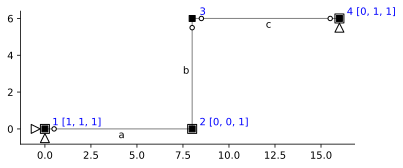

In [3]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [4]:
A = em.A_matrix(mdl).remove('frame-axial')
A.c

,$1$,$2$,$3$
$a_3$,-0.125,1.0,0.000000
$b_2$,-0.000,1.0,0.166667


In [5]:
ker = A.c.ker 
A_cm = ker/ker[0]
A_cm

,0
0,1.000
1,0.125
2,-0.750


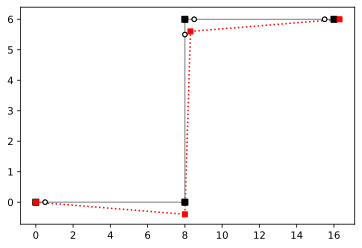

In [6]:
em.plot_U(mdl, ker, ax, scale=0.5)

In [7]:
A.f@A_cm

,0
0,-1.250000e-01
1,-1.804112e-16
2,-4.394633e-17
3,-1.250000e-01
4,1.250000e-01
5,1.250000e-01
